# Grouping #1

In [1]:
import pandas as pd

### 1. 데이터를 로드하고 상위 5개 컬럼을 출력하라

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2. 데이터의 각 host_name의 빈도수를 구하고 host_name으로 정렬하여 상위 5개를 출력하라

In [3]:
df.host_name.value_counts().sort_index().head()

'Cil                        1
(Ari) HENRY LEE             1
(Email hidden by Airbnb)    6
(Mary) Haiy                 1
-TheQueensCornerLot         1
Name: host_name, dtype: int64

In [4]:
df.groupby('host_name').size().head()

host_name
'Cil                        1
(Ari) HENRY LEE             1
(Email hidden by Airbnb)    6
(Mary) Haiy                 1
-TheQueensCornerLot         1
dtype: int64

### 3. 데이터의 각 host_name의 빈도수를 구하고 빈도수 기준 내림차순 정렬한 데이터 프레임을 만들어라. 빈도수 컬럼은 counts로 명명하라

In [5]:
Ans = df.groupby('host_name').size().to_frame().rename(columns={0:'counts'}).sort_values('counts',ascending=False)
Ans.head()

,counts
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279


In [6]:
ans = pd.DataFrame(df.host_name.value_counts(ascending=False))
ans = ans.reset_index().rename(columns={'index':'host_name','host_name':'counts'}).set_index('host_name')
ans.head()

,counts
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279


### 4. neighbourhood_group의 값에 따른 neighbourhood컬럼 값의 갯수를 구하여라

In [7]:
df.groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].count().to_frame()

neighbourhood
neighbourhood_group neighbourhood               
Bronx               Allerton                  42
                    Baychester                 7
                    Belmont                   24
                    Bronxdale                 19
                    Castle Hill                9
...                                          ...
Staten Island       Tottenville                7
                    West Brighton             18
                    Westerleigh                2
                    Willowbrook                1
                    Woodrow                    1

[221 rows x 1 columns]

In [8]:
Ans = df.groupby(['neighbourhood_group','neighbourhood'], as_index=False).size()
Ans

,neighbourhood_group,neighbourhood,size
0,Bronx,Allerton,42
1,Bronx,Baychester,7
2,Bronx,Belmont,24
3,Bronx,Bronxdale,19
4,Bronx,Castle Hill,9
...,...,...,...
216,Staten Island,Tottenville,7
217,Staten Island,West Brighton,18
218,Staten Island,Westerleigh,2
219,Staten Island,Willowbrook,1


### 5. neighbourhood_group의 값에 따른 neighbourhood컬럼 값 중 neighbourhood_group그룹의 최댓값들을 출력하라

In [9]:
df.groupby('neighbourhood_group')['neighbourhood'].max().to_frame()

,neighbourhood
neighbourhood_group,
Bronx,Woodlawn
Brooklyn,Windsor Terrace
Manhattan,West Village
Queens,Woodside
Staten Island,Woodrow


In [10]:
Ans= df.groupby(['neighbourhood_group','neighbourhood'], as_index=False).size().groupby(['neighbourhood_group'], as_index=False).max()
Ans

,neighbourhood_group,neighbourhood,size
0,Bronx,Woodlawn,70
1,Brooklyn,Windsor Terrace,3920
2,Manhattan,West Village,2658
3,Queens,Woodside,900
4,Staten Island,Woodrow,48


### 6. neighbourhood_group 값에 따른 price값의 평균, 분산, 최대, 최소 값을 구하여라

In [11]:
df.groupby('neighbourhood_group')['price'].agg(['mean','var','max','min'])

,mean,var,max,min
neighbourhood_group,,,,
Bronx,87.496792,11386.885081,2500,0
Brooklyn,124.383207,34921.719135,10000,0
Manhattan,196.875814,84904.159185,10000,0
Queens,99.517649,27923.130227,10000,10
Staten Island,114.812332,77073.088342,5000,13


In [12]:
Ans = df[['neighbourhood_group','price']].groupby('neighbourhood_group').agg(['mean','var','max','min'])
Ans

price                         
                           mean           var    max min
neighbourhood_group                                     
Bronx                 87.496792  11386.885081   2500   0
Brooklyn             124.383207  34921.719135  10000   0
Manhattan            196.875814  84904.159185  10000   0
Queens                99.517649  27923.130227  10000  10
Staten Island        114.812332  77073.088342   5000  13

### 7. neighbourhood_group 값에 따른 reviews_per_month 평균, 분산, 최대, 최소 값을 구하여라

In [13]:
df.groupby('neighbourhood_group')['reviews_per_month'].agg(['mean','var','max','min'])

,mean,var,max,min
neighbourhood_group,,,,
Bronx,1.837831,2.799878,10.34,0.02
Brooklyn,1.283212,2.299040,14.00,0.01
Manhattan,1.272131,2.651206,58.50,0.01
Queens,1.941200,4.897848,20.94,0.01
Staten Island,1.872580,2.840895,10.12,0.02


In [14]:
Ans = df[['neighbourhood_group','reviews_per_month']].groupby('neighbourhood_group').agg(['mean','var','max','min'])
Ans

reviews_per_month                       
                                 mean       var    max   min
neighbourhood_group                                         
Bronx                        1.837831  2.799878  10.34  0.02
Brooklyn                     1.283212  2.299040  14.00  0.01
Manhattan                    1.272131  2.651206  58.50  0.01
Queens                       1.941200  4.897848  20.94  0.01
Staten Island                1.872580  2.840895  10.12  0.02

### 8. neighbourhood 값과 neighbourhood_group 값에 따른 price 의 평균을 구하라

In [15]:
df.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean()

neighbourhood    neighbourhood_group
Allerton         Bronx                   87.595238
Arden Heights    Staten Island           67.250000
Arrochar         Staten Island          115.000000
Arverne          Queens                 171.779221
Astoria          Queens                 117.187778
                                           ...    
Windsor Terrace  Brooklyn               138.993631
Woodhaven        Queens                  67.170455
Woodlawn         Bronx                   60.090909
Woodrow          Staten Island          700.000000
Woodside         Queens                  85.097872
Name: price, Length: 221, dtype: float64

### 9. neighbourhood 값과 neighbourhood_group 값에 따른 price 의 평균을 계층적 indexing 없이 구하라

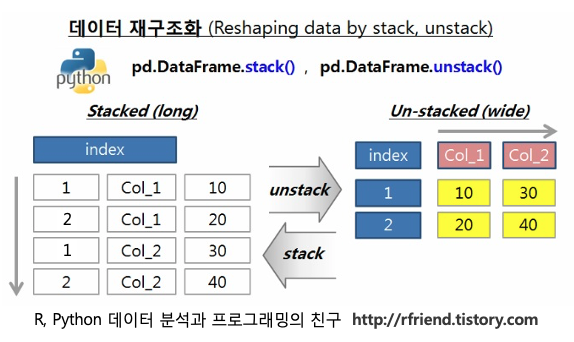

    - stack : 위에서 아래로 (행방향)
    - unstack : 왼쪽에서 오른쪽으로 (열방향)

In [16]:
df.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
neighbourhood,,,,,
Allerton,87.595238,NaN,NaN,NaN,NaN
Arden Heights,NaN,NaN,NaN,NaN,67.25
Arrochar,NaN,NaN,NaN,NaN,115.00
Arverne,NaN,NaN,NaN,171.779221,NaN
Astoria,NaN,NaN,NaN,117.187778,NaN
...,...,...,...,...,...
Windsor Terrace,NaN,138.993631,NaN,NaN,NaN
Woodhaven,NaN,NaN,NaN,67.170455,NaN
Woodlawn,60.090909,NaN,NaN,NaN,NaN


### 10. neighbourhood 값과 neighbourhood_group 값에 따른 price 의 평균을 계층적 indexing 없이 구하고 nan 값은 -999값으로 채워라

In [17]:
df.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean().unstack().fillna(-999)

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
neighbourhood,,,,,
Allerton,87.595238,-999.000000,-999.0,-999.000000,-999.00
Arden Heights,-999.000000,-999.000000,-999.0,-999.000000,67.25
Arrochar,-999.000000,-999.000000,-999.0,-999.000000,115.00
Arverne,-999.000000,-999.000000,-999.0,171.779221,-999.00
Astoria,-999.000000,-999.000000,-999.0,117.187778,-999.00
...,...,...,...,...,...
Windsor Terrace,-999.000000,138.993631,-999.0,-999.000000,-999.00
Woodhaven,-999.000000,-999.000000,-999.0,67.170455,-999.00
Woodlawn,60.090909,-999.000000,-999.0,-999.000000,-999.00


### 11. 데이터 중 neighbourhood_group 값이 Queens 값을 가지는 데이터들 중 neighbourhood 그룹별로 price 값의 평균, 분산, 최대, 최소값을 구하라

In [18]:
df[df['neighbourhood_group'] == 'Queens'].groupby('neighbourhood')['price'].agg(['mean', 'var', 'max', 'min'])

,mean,var,max,min
neighbourhood,,,,
Arverne,171.779221,37383.411141,1500,35
Astoria,117.187778,122428.811196,10000,25
Bay Terrace,142.000000,6816.400000,258,32
Bayside,157.948718,166106.470985,2600,30
Bayswater,87.470588,2330.889706,230,45
Belle Harbor,171.500000,8226.571429,350,85
Bellerose,99.357143,3093.016484,240,42
Breezy Point,213.333333,1008.333333,250,195
Briarwood,105.875000,18503.165909,1000,30


### 12. 데이터 중 neighbourhood_group 값에 따른 room_type 컬럼의 숫자를 구하고 neighbourhood_group 값을 기준으로 각 값의 비율을 구하여라

In [19]:
ans = df[['neighbourhood_group', 'room_type']].groupby(['neighbourhood_group', 'room_type']).size().unstack()
ans.loc[:,:] = (ans.values / ans.sum(axis=1).values.reshape(-1,1))
ans

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0.347388,0.597617,0.054995
Brooklyn,0.475478,0.503979,0.020543
Manhattan,0.609344,0.368496,0.022160
Queens,0.369926,0.595129,0.034945
Staten Island,0.471850,0.504021,0.024129
